## 计算

调用calculate_real_from_csv()计算策略之前协方差。

调用A5_matrix_X()计算A5矩阵的实耦合。参数a = [-4.236,-0.618,0.234,1.618,4.236]，mode_col = A5_mode_1 或A5_mode_2

计算两种模式实耦合与协方差之间的相关系数

In [1]:
import pandas as pd
from calculate import *
from from_eigenvector_out_XY import *

#A5 = Matrix([[0, a, 1, -1, -a],
#             [-a, 0, a, 1, -1],
#             [-1, -a, 0, a, 1],
#             [1, -1, -a, 0, a],
#             [a, 1, -1, -a, 0]])



#the value for a , support in range[-4.236,-0.618,0.234,1.618,4.236]
A5_a_value_list = [-4.236,-0.618,0.234,1.618,4.236]

#the column number of eigenvector matrix
A5_mode_1 = 2
A5_mode_2 = 3

#the start for calculating , The data before the start_round will be truncated when calculating
start_round = 1000



for i in A5_a_value_list:
    A5_a_value = i
    result = pd.DataFrame()
#the csv file path
    A5_csv_name = '.\\data\\A5_'+(str)(A5_a_value)+'_Strategy_distributions.csv'

#calculate_real_from_csv(csv_name,start_round):
    sum_lst = calculate_real_from_csv(A5_csv_name,start_round)
#print("csv result :",sum_lst)

#A5_matrix_X(a_value,mode_col):
    xmn1 = A5_matrix_X(A5_a_value,A5_mode_1)
#print("eigen vector mode1 result :",xmn1)

    xmn2 = A5_matrix_X(A5_a_value,A5_mode_2)
#print("eigen vector mode2 result :",xmn2)

#calculate the correlation coefficient
    data = pd.DataFrame()
    data['A'] = sum_lst
    data['B']=xmn1
    cor1 = data.A.corr(data.B)
    data['C']=xmn2
    cor2 = data.A.corr(data.C)
    result[(str)(A5_a_value) + '_from_csv'] = sum_lst
    result[(str)(A5_a_value) + '_mode1'] = xmn1
    result[(str)(A5_a_value) + '_mode2'] = xmn2
#print("the correlation coefficient of mode 1 is :" ,cor1)
#print("the correlation coefficient of mode 2 is :" ,cor2)
    result.to_csv('.\\result\\A5_' + (str)(A5_a_value) + '_result.csv')


## 数据分析

对数据进行二元线性回归分析

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


#the value for a , support in range[-4.236,-0.618,0.234,1.618,4.236]
A5_a_value = 4.236
result_csv_name = '.\\result\\A5_' + (str)(A5_a_value) + '_result.csv'
data = pd.read_csv(result_csv_name)


x = sm.add_constant(data.iloc[:,2:]) #生成自变量
y = data[(str)(A5_a_value) + '_from_csv'] #生成因变量
model = sm.OLS(y, x) #生成模型
res = model.fit() #模型拟合
print(res.summary()) #模型描述


                            OLS Regression Results                            
Dep. Variable:         4.236_from_csv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4549.
Date:                Mon, 08 May 2023   Prob (F-statistic):           5.22e-18
Time:                        13:48:59   Log-Likelihood:                 143.74
No. Observations:                  15   AIC:                            -281.5
Df Residuals:                      12   BIC:                            -279.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.618e-17      5e-06   3.23e-12      

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 图像绘制

绘制二元线性回归图像

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


const          1.618172e-17
4.236_mode1    1.907155e-06
4.236_mode2    8.054137e-06
dtype: float64


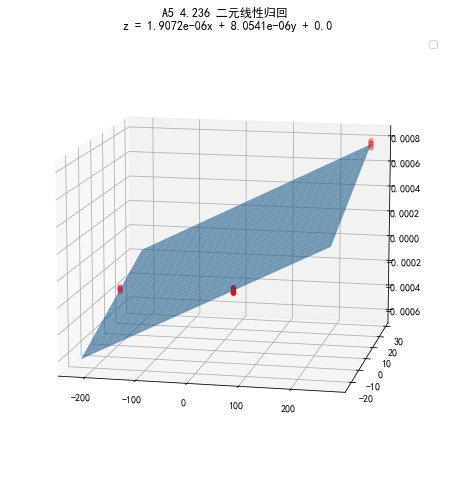

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 1. 读取数据
x_1 = data[(str)(A5_a_value) + '_mode1']
x_2 = data[(str)(A5_a_value) + '_mode2']
y_t = data[(str)(A5_a_value) + '_from_csv']


fig = plt.figure(figsize=(8,8))



ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x_1, x_2, y_t, c='red', s=20)

k = res.params
print(k)

x1 = np.linspace(min(x_1), max(x_1), 100)
x2 = np.linspace(min(x_2), max(x_2), 100)
x, y =np.meshgrid(x1, x2)
z = k[0] + k[1] * x + k[2] * y
ax.plot_surface(x, y, z,rstride=4,cstride=4,alpha=0.6)
ax.legend()
ax.set_title(('A5 ' + (str)(A5_a_value)  + ' 二元线性归回\n z = {}x + {}y + {}').format(round(k[1],10), round(k[2],10),round(k[0],10)))
ax.view_init(12,-78)

plt.show()
fig_name = ".\\figure\\A5_" + (str)(A5_a_value) +".png"
fig.savefig(fig_name)